In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = '/content/car_evaluation.csv'

df = pd.read_csv(data, header=None)

#**EDA**

In [2]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Rename columns

In [3]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [5]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


### The class values represent the evaluation of the car.
1.   unacc: Unacceptable
2.   acc: Acceptable
3.   good: Good
4.   Very Good


 bar plots to visualize the distribution of buying, maint, doors, persons, lug_boot, and safety columns

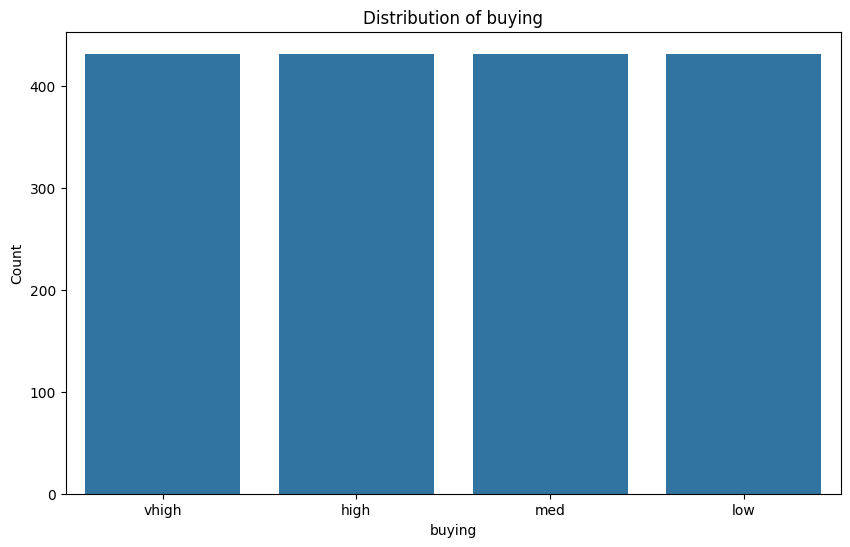

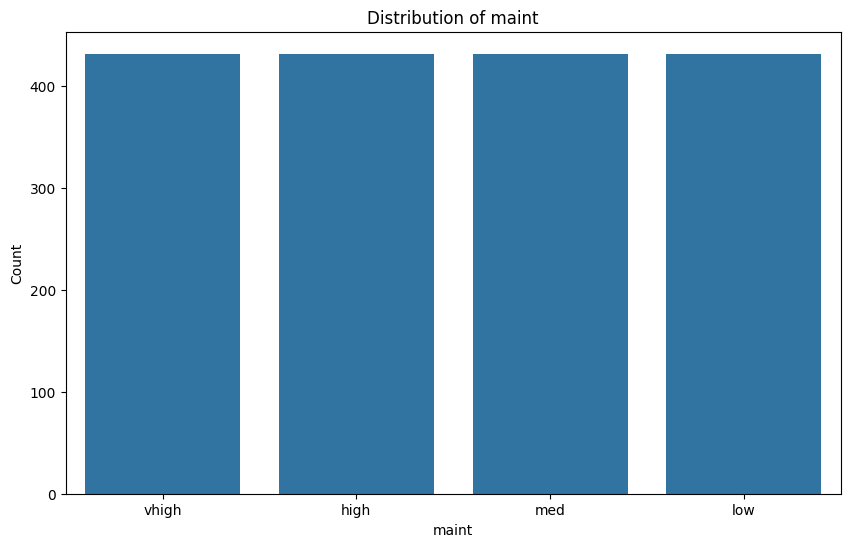

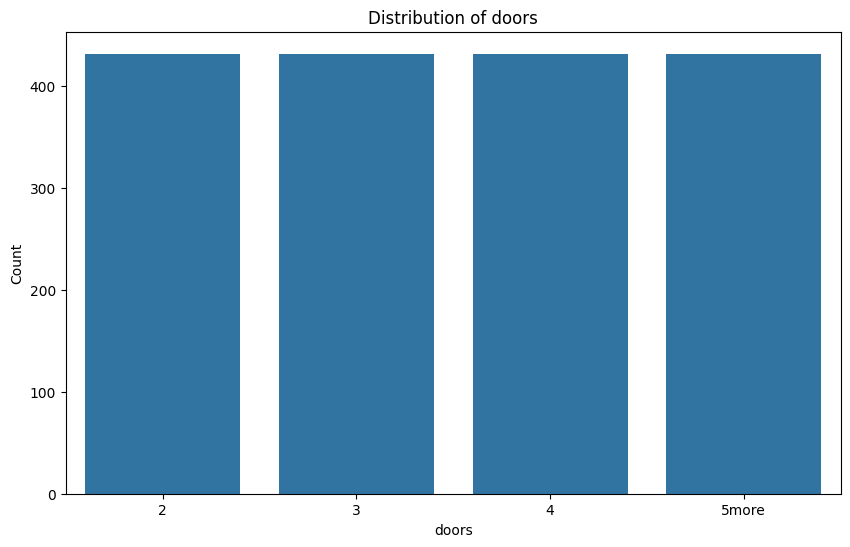

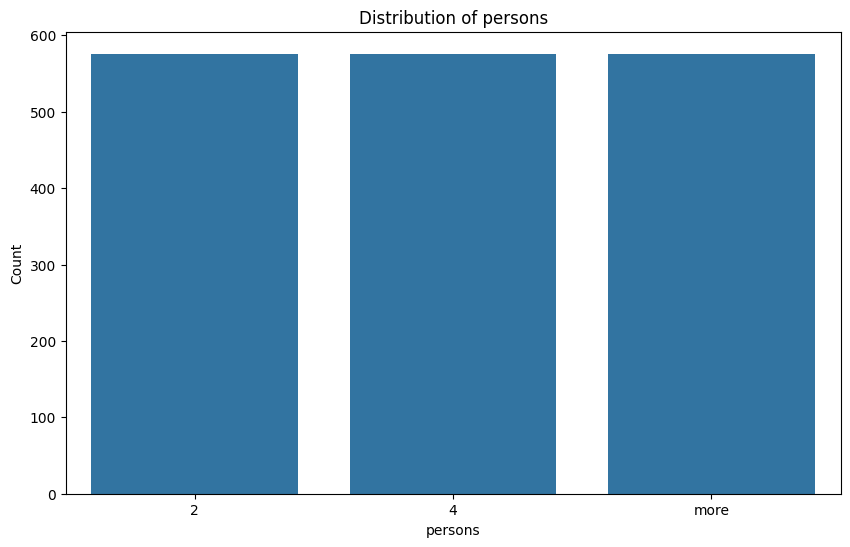

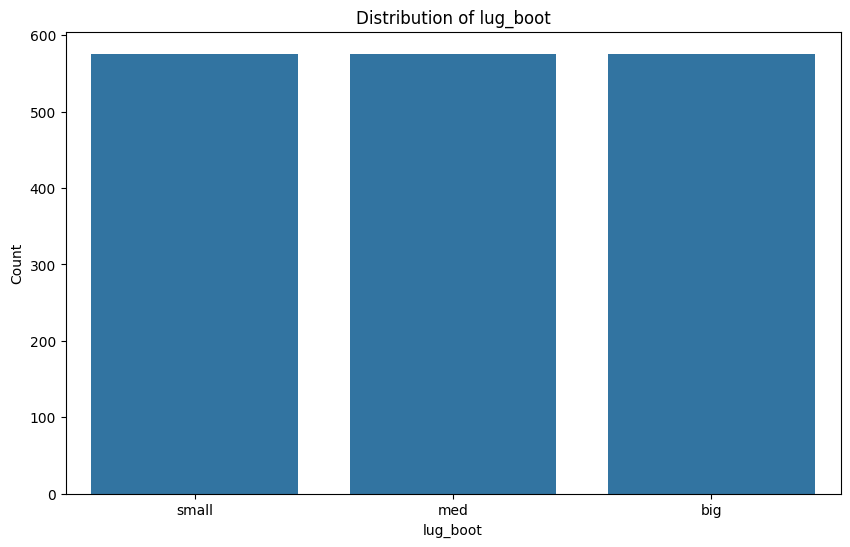

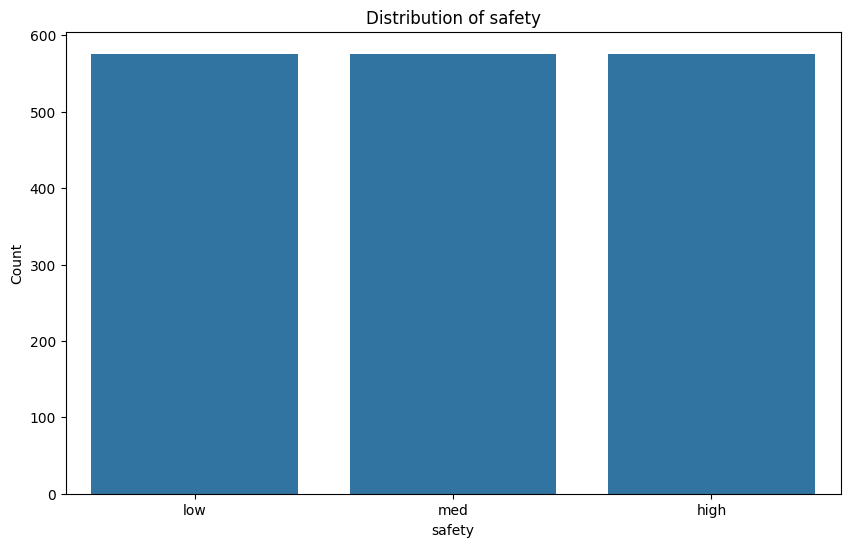

In [6]:
#Plot the distribution of each feature
categorical_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for feature in categorical_features:
  plt.figure(figsize=(10,6))
  sns.countplot(x=feature, data=df)
  plt.title(f"Distribution of {feature}")
  plt.xlabel(feature)
  plt.ylabel("Count")
  plt.show()

analyze the distribution of the target variable 'class', use a countplot

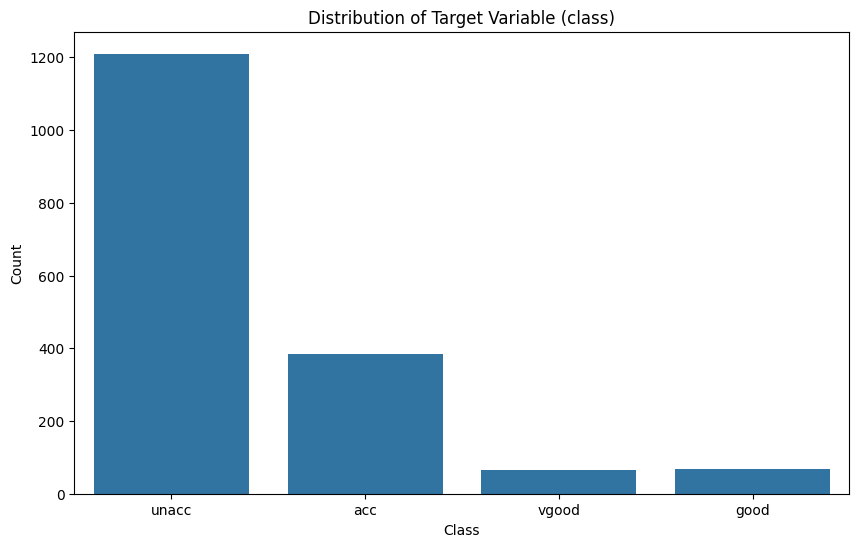

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df)
plt.title("Distribution of Target Variable (class)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Bivariate Analysis Categorical vs. Categorical: Analyze the relationship between each feature and the target variable

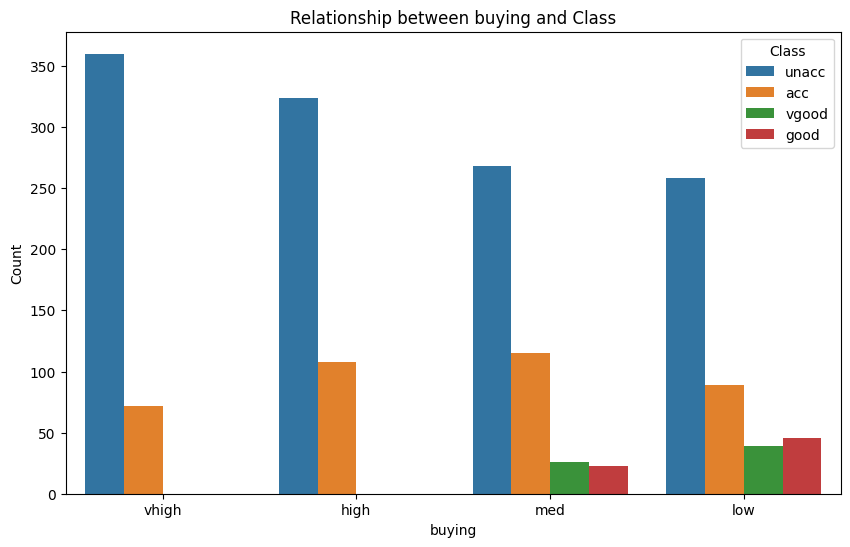

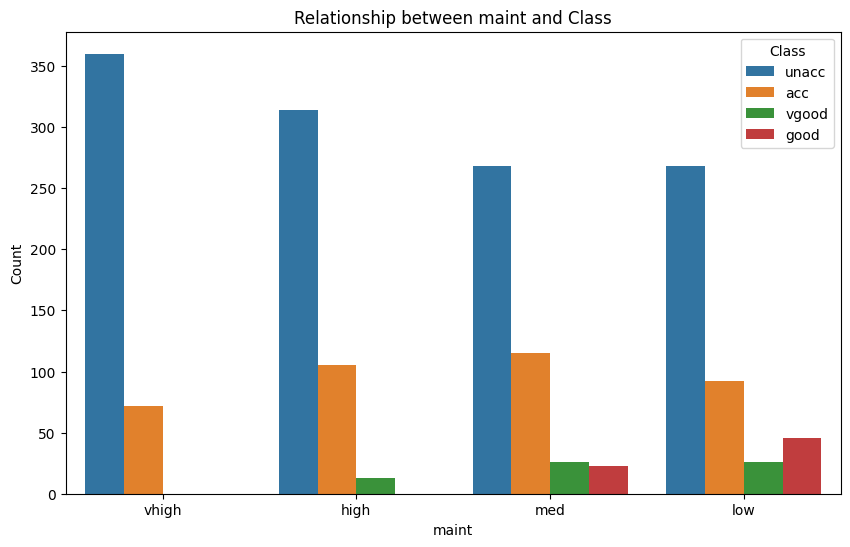

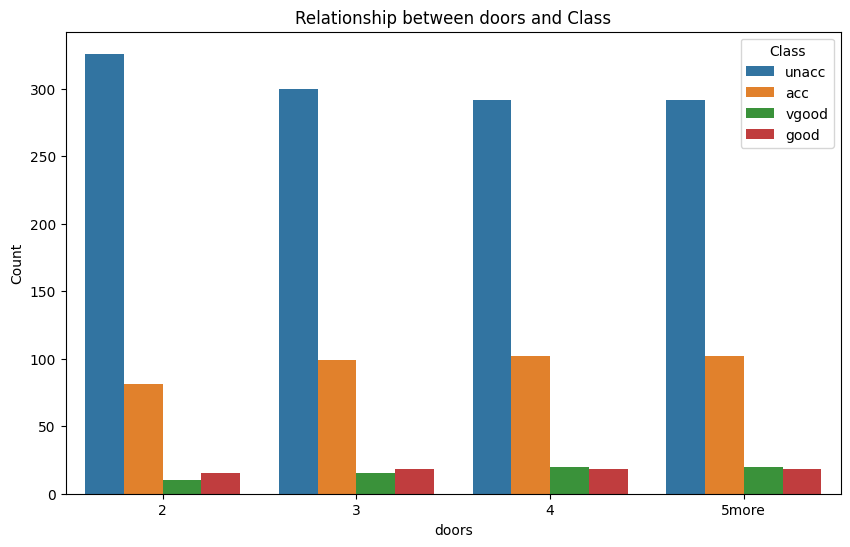

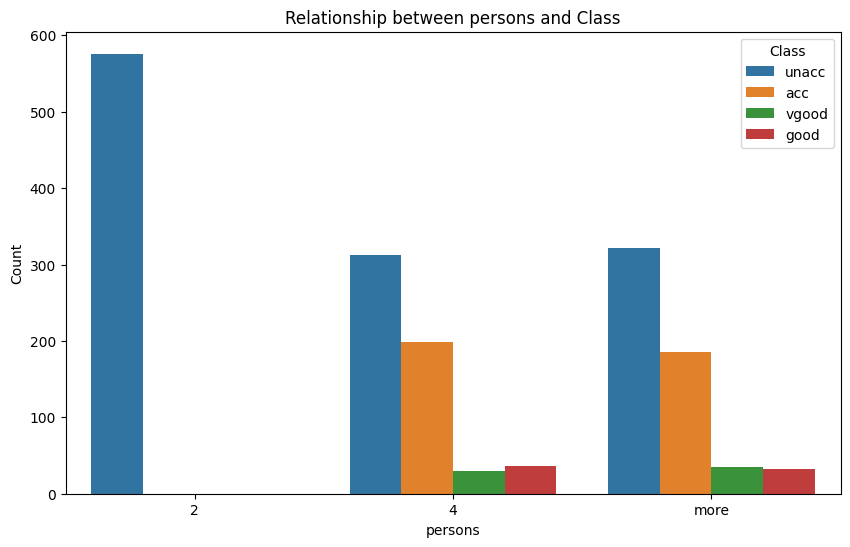

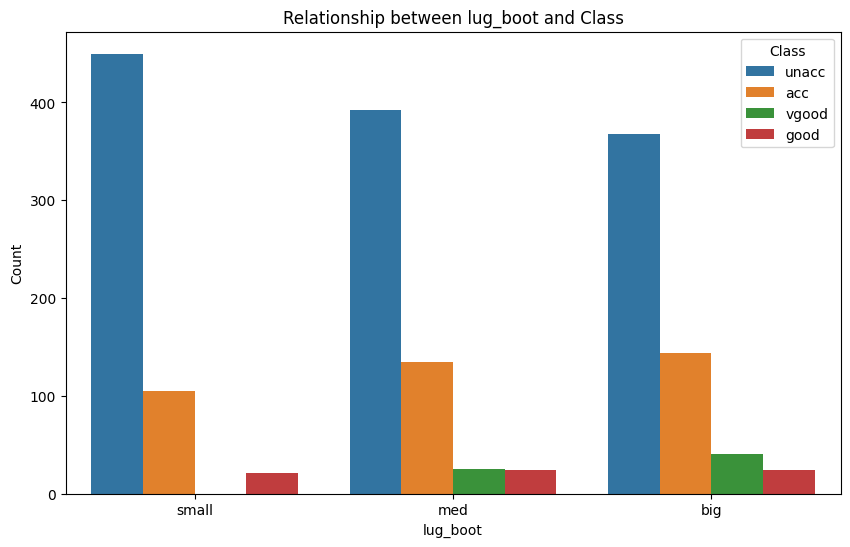

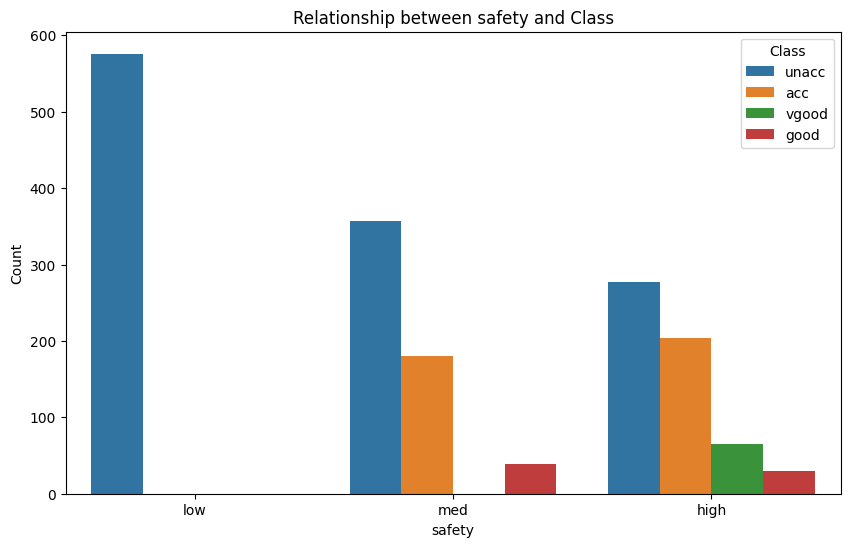

In [8]:
categorical_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='class', data=df)
    plt.title(f"Relationship between {feature} and Class")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Class')
    plt.show()

 Multivariate Analysis - Heatmap of cross-tabulation

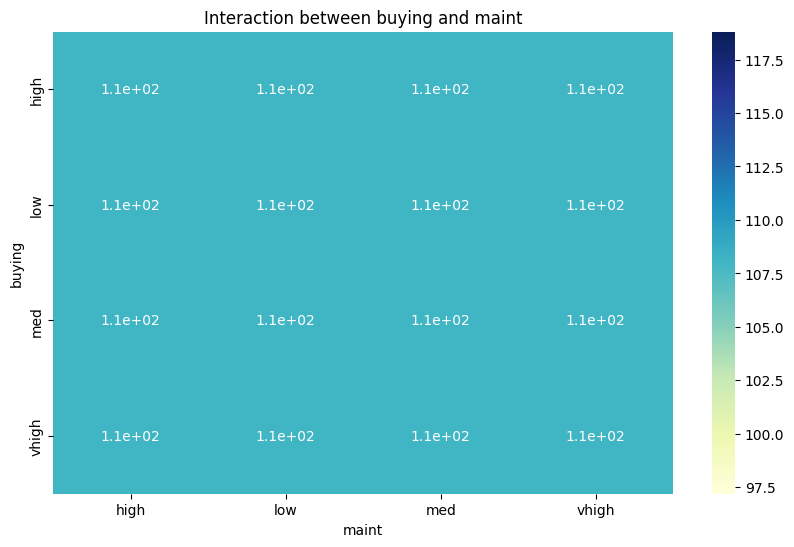

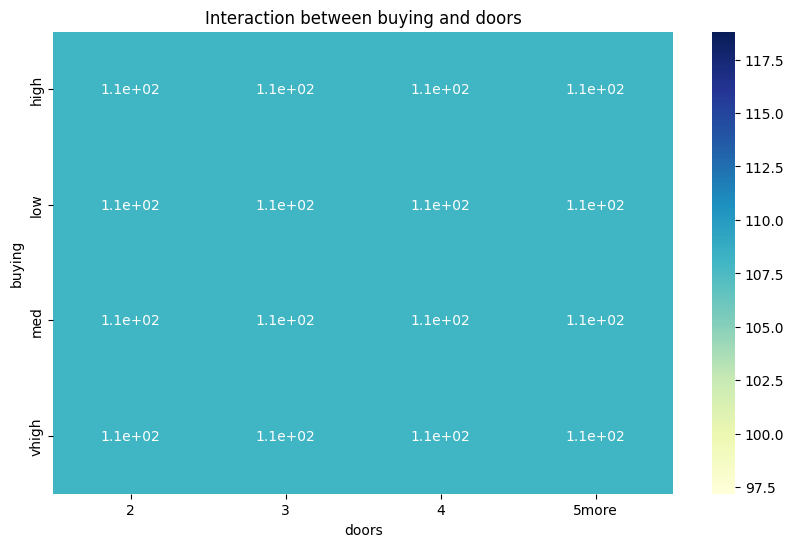

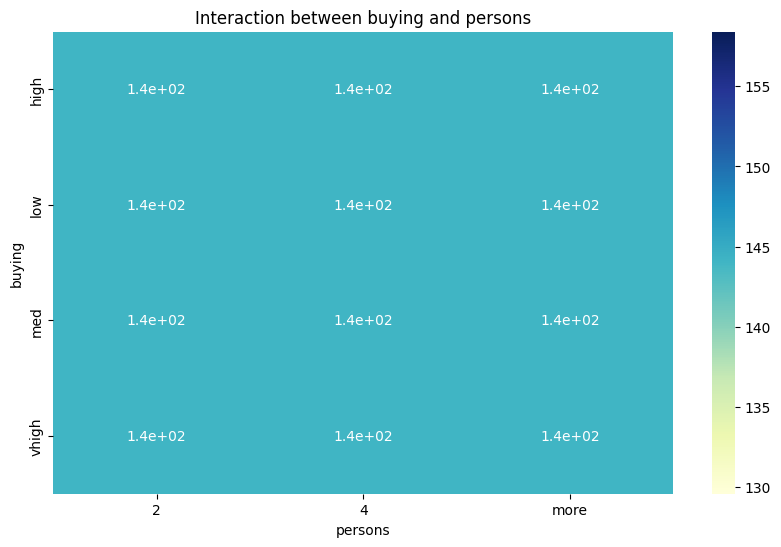

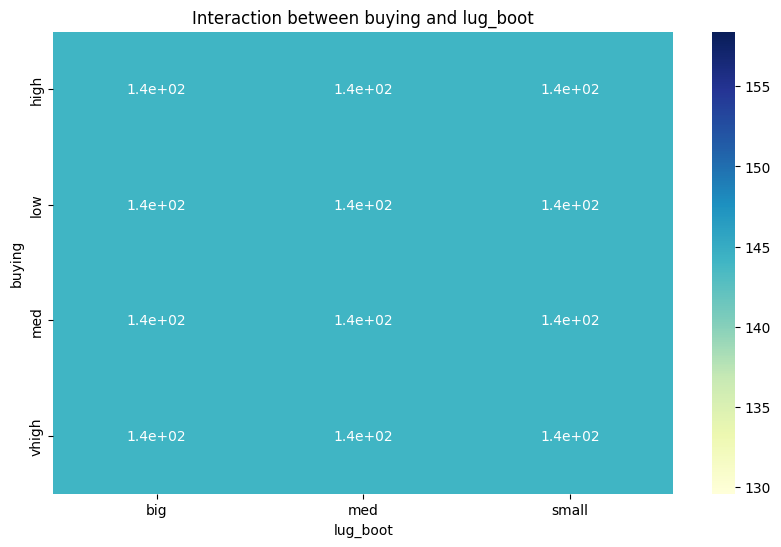

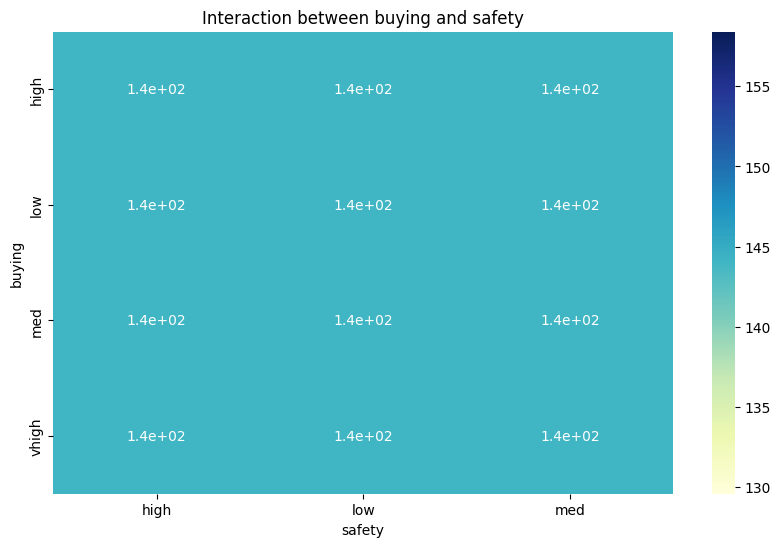

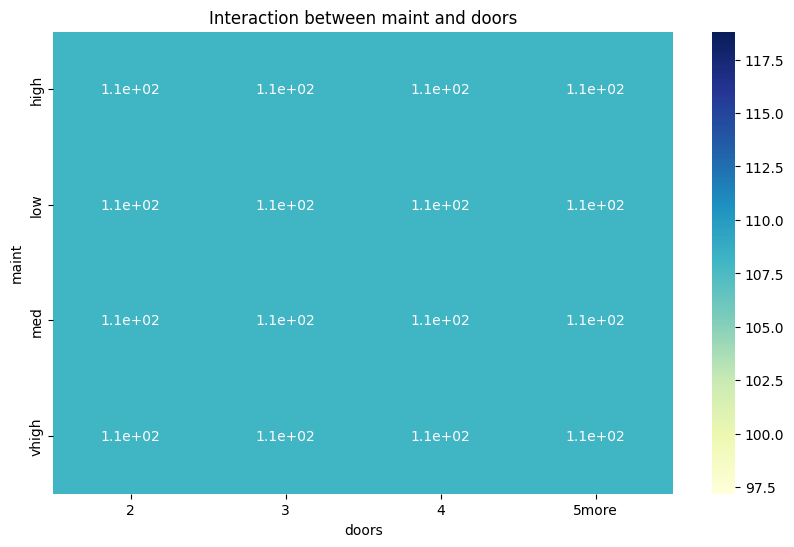

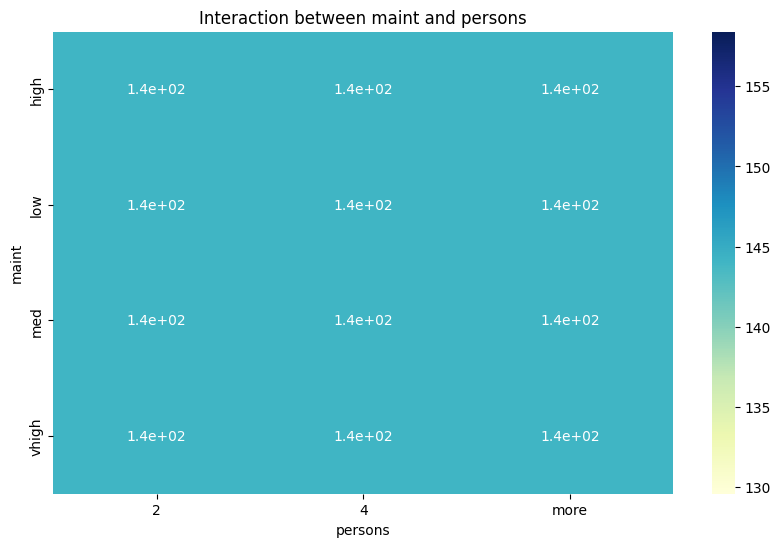

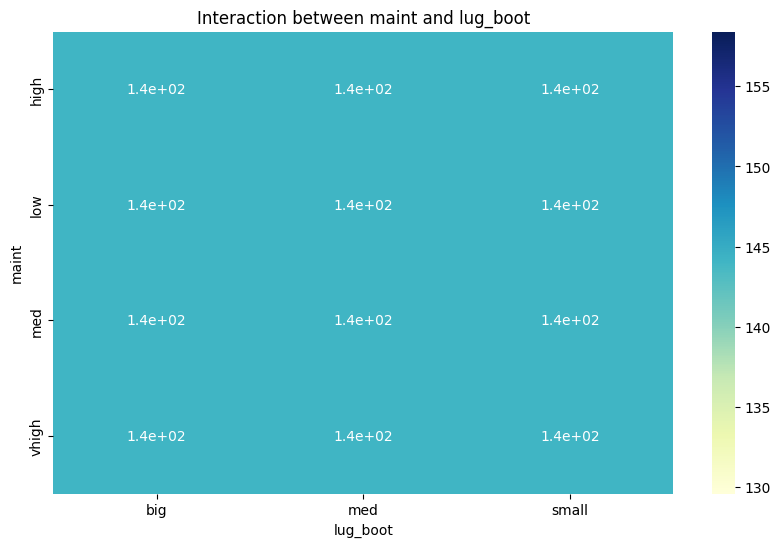

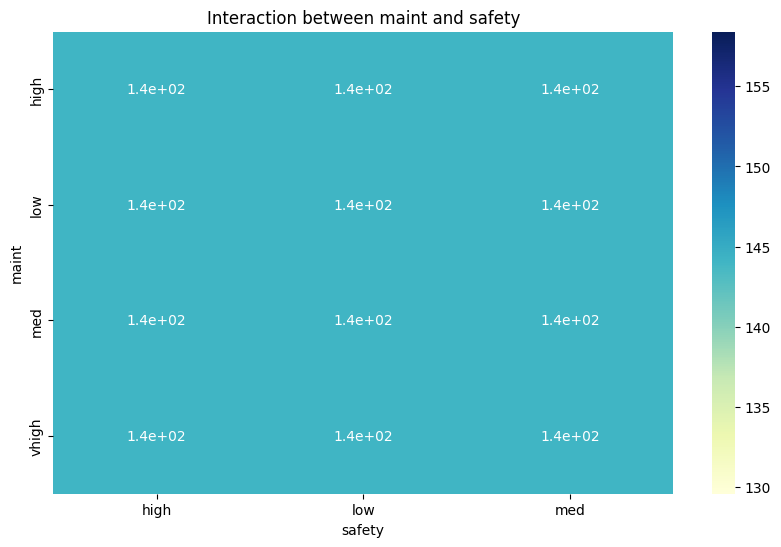

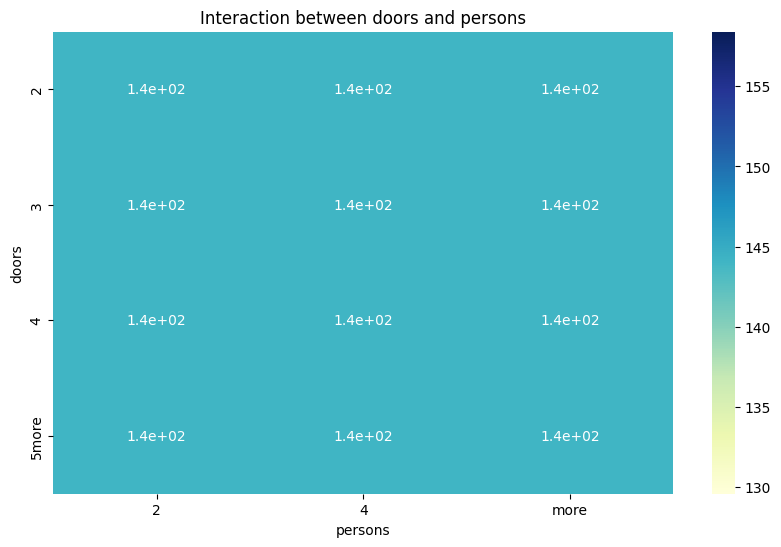

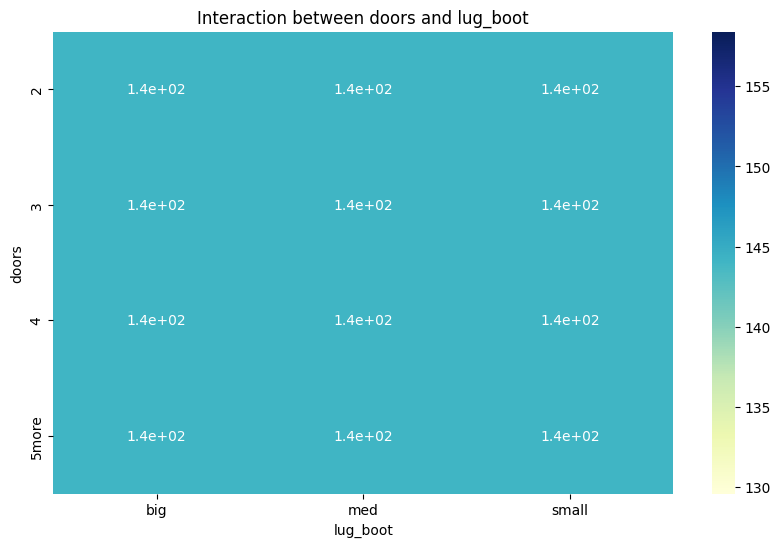

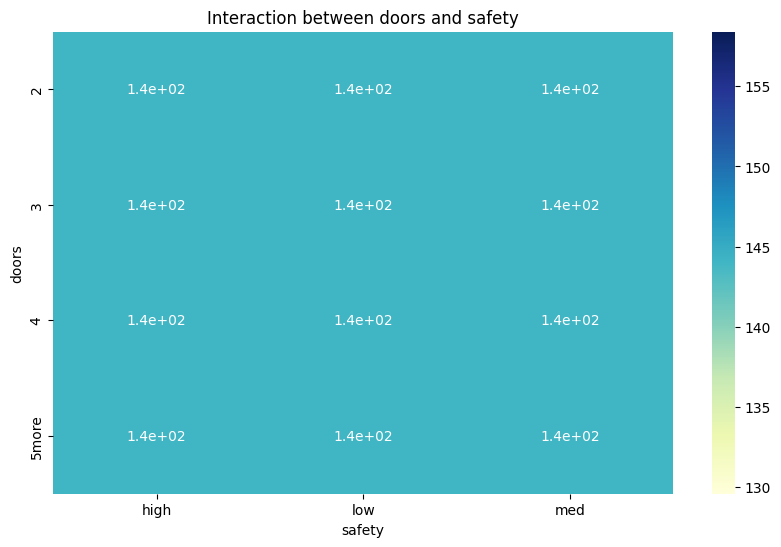

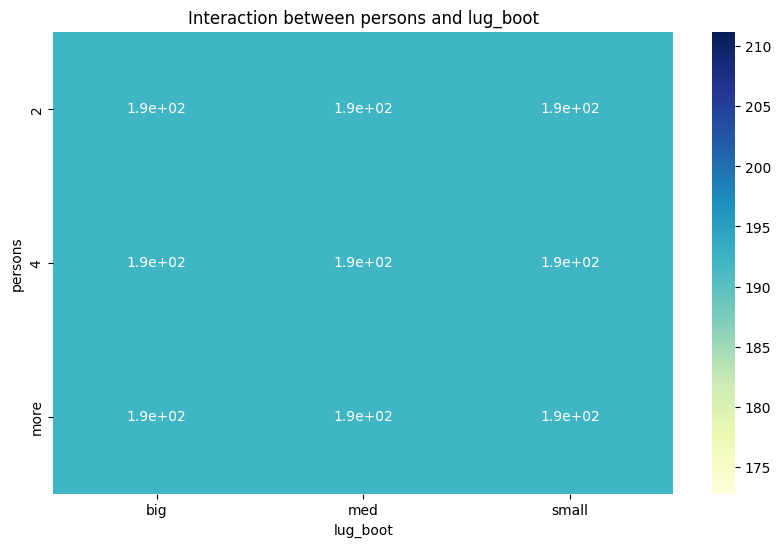

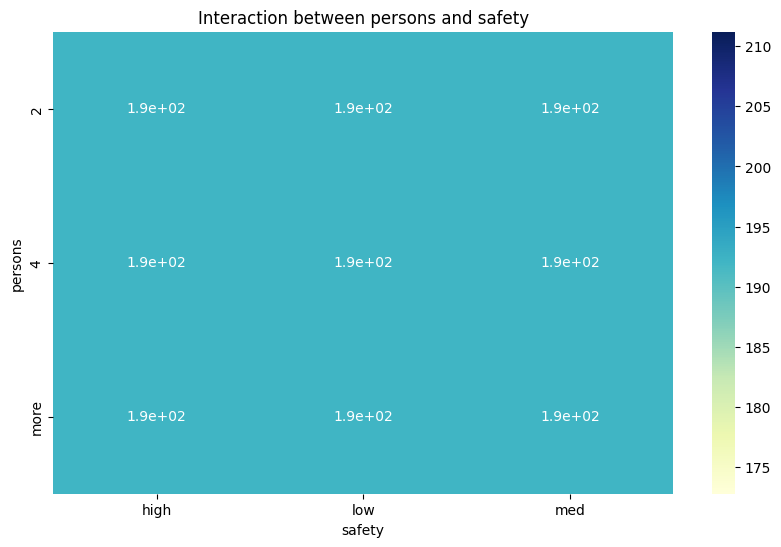

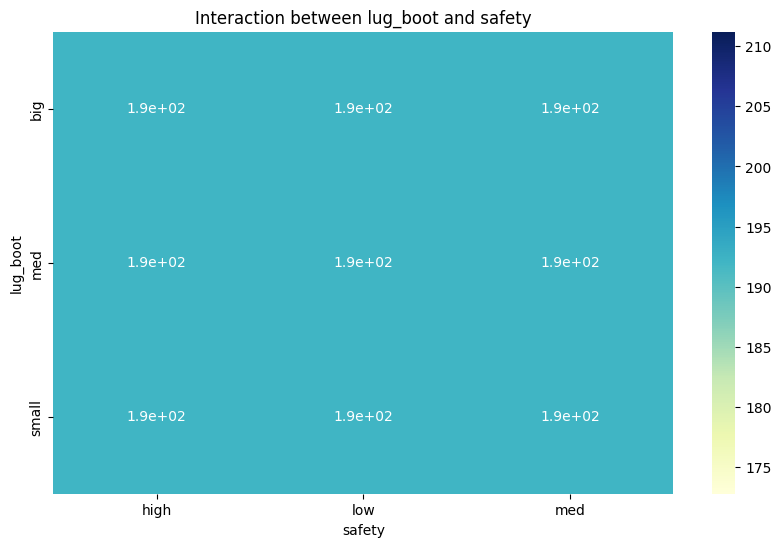

In [10]:
# Create cross-tabulation for all pairs of features
from itertools import combinations

for feature1, feature2 in combinations(categorical_features, 2):
    crosstab = pd.crosstab(df[feature1], df[feature2])
    plt.figure(figsize=(10, 6))
    sns.heatmap(crosstab, annot=True, cmap='YlGnBu')
    plt.title(f"Interaction between {feature1} and {feature2}")
    plt.show()

In [14]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [15]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

### Feature vector and the target

In [39]:
X = df.drop(['class'], axis=1)

y = df['class']

# imbancement
## oversampling

*   duplicates samples from the minority classes ('acc', 'good', 'vgood') until they have the same number of samples as the majority class ('unacc').




In [40]:
# Separate minority and majority classes
df_unacc = X[y == 'unacc']
df_acc = X[y == 'acc']
df_good = X[y == 'good']
df_vgood = X[y == 'vgood']

# Upsample minority classes to match the size of the majority class
df_acc_upsampled = df_acc.sample(n=len(df_unacc), replace=True, random_state=42)
df_good_upsampled = df_good.sample(n=len(df_unacc), replace=True, random_state=42)
df_vgood_upsampled = df_vgood.sample(n=len(df_unacc), replace=True, random_state=42)

# Concatenate all the dataframes
X_train_resampled = pd.concat([df_unacc, df_acc_upsampled, df_good_upsampled, df_vgood_upsampled])
y_train_resampled = pd.concat([y[y == 'unacc'],
                               y[y == 'acc'].sample(n=len(df_unacc), replace=True, random_state=42),
                               y[y == 'good'].sample(n=len(df_unacc), replace=True, random_state=42),
                               y[y == 'vgood'].sample(n=len(df_unacc), replace=True, random_state=42)])

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_resampled, y_train_resampled, test_size = 0.33, random_state = 42)

In [42]:
X_train.shape, X_test.shape

((3242, 6), (1598, 6))

In [43]:
y_train_resampled.value_counts()

class
unacc    1210
acc      1210
good     1210
vgood    1210
Name: count, dtype: int64

## Encode categorical variables

In [44]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()


columns_to_encode = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
for col in columns_to_encode:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

In [45]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1133,2,2,1,2,0,0
1538,1,2,0,2,0,0
1696,1,1,2,2,1,2
1619,1,2,3,2,0,0
605,0,0,2,1,2,0


In [46]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1643,1,1,0,2,1,0
1699,1,1,2,2,0,2
1700,1,1,2,2,0,0
1103,2,2,0,2,1,0
1022,2,0,1,2,1,0


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
dtree_model = DecisionTreeClassifier()

# Train the model
dtree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dtree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9981226533166458
              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       403
        good       1.00      1.00      1.00       375
       unacc       1.00      1.00      1.00       428
       vgood       0.99      1.00      1.00       392

    accuracy                           1.00      1598
   macro avg       1.00      1.00      1.00      1598
weighted avg       1.00      1.00      1.00      1598

Confusion Matrix:
 [[401   0   0   2]
 [  0 375   0   0]
 [  1   0 427   0]
 [  0   0   0 392]]


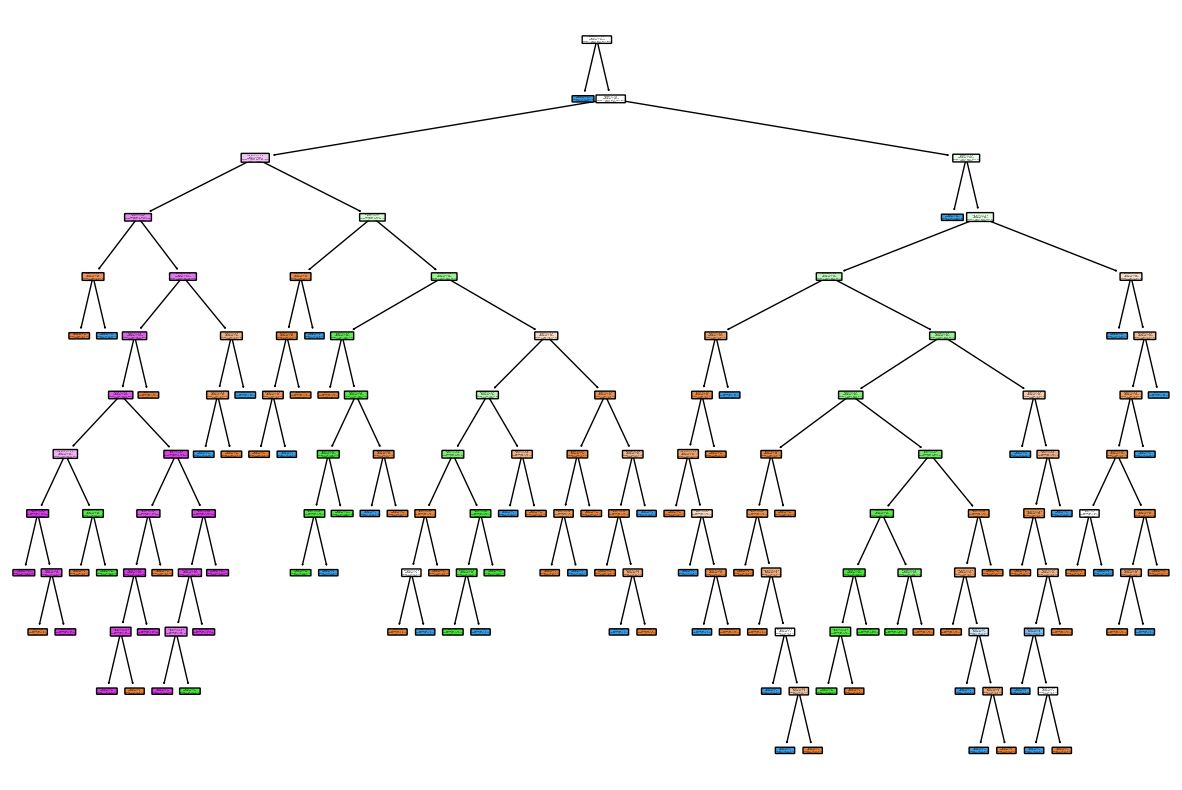

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(dtree_model,
          feature_names=X_train_resampled.columns,
          class_names=np.unique(y_train_resampled),
          filled=True,
          rounded=True)
plt.show()

In [32]:
# Determine nodes
n_nodes = dtree_model.tree_.node_count # Use dtree_model instead of clf
children_left = dtree_model.tree_.children_left
children_right = dtree_model.tree_.children_right
feature_names = dtree_model.tree_.feature # Rename to avoid conflict with the 'feature' variable
threshold = dtree_model.tree_.threshold

# The root node is the first node (node 0)
root_node = 0

# Decision nodes are those that are not leaves (have children)
decision_nodes = [i for i in range(n_nodes) if children_left[i] != children_right[i]]

# Leaf nodes are those that do not have children (children_left and children_right are -1)
leaf_nodes = [i for i in range(n_nodes) if children_left[i] == children_right[i]]

print(f"Root node: {root_node}")
print(f"Decision nodes: {decision_nodes}")
print(f"Leaf nodes: {leaf_nodes}")

Root node: 0
Decision nodes: [0, 2, 3, 4, 5, 8, 9, 10, 11, 12, 14, 17, 20, 21, 22, 23, 28, 29, 30, 36, 37, 41, 42, 43, 44, 49, 50, 52, 53, 54, 58, 61, 62, 63, 64, 65, 69, 70, 74, 77, 78, 79, 83, 84, 86, 90, 92, 93, 94, 95, 96, 98, 100, 105, 106, 107, 108, 110, 112, 114, 118, 119, 120, 121, 125, 128, 129, 131, 133, 137, 139, 140, 142, 143, 145, 150, 152, 153, 154, 155, 158, 159]
Leaf nodes: [1, 6, 7, 13, 15, 16, 18, 19, 24, 25, 26, 27, 31, 32, 33, 34, 35, 38, 39, 40, 45, 46, 47, 48, 51, 55, 56, 57, 59, 60, 66, 67, 68, 71, 72, 73, 75, 76, 80, 81, 82, 85, 87, 88, 89, 91, 97, 99, 101, 102, 103, 104, 109, 111, 113, 115, 116, 117, 122, 123, 124, 126, 127, 130, 132, 134, 135, 136, 138, 141, 144, 146, 147, 148, 149, 151, 156, 157, 160, 161, 162, 163, 164]
